In [1]:
import numpy as np
import pandas as pd
import json
import os

In [2]:
df = pd.read_csv (r'C:\Users\DhanrajChowdhury\OneDrive - SPIKEWELL\IntentClassifier\Custom Intent\custom\data.csv')
# df_test = pd.read_csv (r'C:\Users\DhanrajChowdhury\OneDrive - SPIKEWELL\IntentClassifier\Custom Intent\atis_snips\snips\test.csv')

# df_train = df_train[df_train["intent"].str.contains("#")==False]
# df_test = df_test[df_test["intent"].str.contains("#")==False]

# df = df_train.append(df_test, ignore_index=True)
# df = pd.concat([df_train, df_test], ignore_index=True, sort=False)

text = df['text']
labels = df['intent']

classes = np.unique(labels)

In [3]:
#convert_to_dataframe

data = pd.DataFrame({'text': text, 'intent': labels})
print(data)

                                                 text          intent
0   Unable to Print from Scheduler. No Printers Ap...   Printer Issue
1             mouse is not showing in the device list  Hardware Issue
2             Reset STAR Password Allscripts McKesson     Login Issue
3                How to Filter Medications and Orders    Search Issue
4                            The wifi is out of range  Hardware Issue
5                            Web Browser Installation  Software Issue
6       How to Create a New PowerNote from an old one  Software Issue
7                   The paper is stuck in the printer   Printer Issue
8                         Client is already logged in     Login Issue
9   Resetting Bridge Medical (Blood Transfusion) P...     Login Issue
10                                       Login Issues     Login Issue
11                      Find ARCHIVED IRM Code Pagers    Search Issue
12                       The device is not responding  Hardware Issue
13                  

In [4]:
with pd.option_context('display.max_rows', None):
    print(data.groupby("intent").count())
    
data.groupby("intent").count().shape

                text
intent              
Hardware Issue    10
Login Issue       15
Printer Issue      5
Search Issue      12
Software Issue    14


(5, 1)

In [5]:
classes

array(['Hardware Issue', 'Login Issue', 'Printer Issue', 'Search Issue',
       'Software Issue'], dtype=object)

In [6]:
#convert_to_lower_case

data["lower"] = data.text.map(lambda x : x.lower())

In [7]:
# import nltk
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download('omw-1.4')

In [8]:
#word_tokenize

from nltk import word_tokenize

data["tokenized"] = data.lower.map(word_tokenize)

In [9]:
#stopwords_remove

from nltk.corpus import stopwords
from string import punctuation

def remove_stop(strings, stop_list):
    classed = [s for s in strings if s not in stop_list]
    return classed

stop = stopwords.words("english")
stop_punc = list(set(punctuation)) + stop

data["selected"] = data.tokenized.map(lambda df: remove_stop(df, stop_punc))

In [10]:
#normalize

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def normalize(text):
    return " ".join(text)

stemmer = LancasterStemmer()

data["lemmatized"] = data.selected.map(lambda xs: [lemmatizer.lemmatize(x) for x in xs])
data["normalized"] = data.lemmatized.apply(normalize)

data

,text,intent,lower,tokenized,selected,lemmatized,normalized
0,Unable to Print from Scheduler. No Printers Ap...,Printer Issue,unable to print from scheduler. no printers ap...,"[unable, to, print, from, scheduler, ., no, pr...","[unable, print, scheduler, printers, appear, f...","[unable, print, scheduler, printer, appear, fa...",unable print scheduler printer appear favorite
1,mouse is not showing in the device list,Hardware Issue,mouse is not showing in the device list,"[mouse, is, not, showing, in, the, device, list]","[mouse, showing, device, list]","[mouse, showing, device, list]",mouse showing device list
2,Reset STAR Password Allscripts McKesson,Login Issue,reset star password allscripts mckesson,"[reset, star, password, allscripts, mckesson]","[reset, star, password, allscripts, mckesson]","[reset, star, password, allscripts, mckesson]",reset star password allscripts mckesson
3,How to Filter Medications and Orders,Search Issue,how to filter medications and orders,"[how, to, filter, medications, and, orders]","[filter, medications, orders]","[filter, medication, order]",filter medication order
4,The wifi is out of range,Hardware Issue,the wifi is out of range,"[the, wifi, is, out, of, range]","[wifi, range]","[wifi, range]",wifi range
5,Web Browser Installation,Software Issue,web browser installation,"[web, browser, installation]","[web, browser, installation]","[web, browser, installation]",web browser installation
6,How to Create a New PowerNote from an old one,Software Issue,how to create a new powernote from an old one,"[how, to, create, a, new, powernote, from, an,...","[create, new, powernote, old, one]","[create, new, powernote, old, one]",create new powernote old one
7,The paper is stuck in the printer,Printer Issue,the paper is stuck in the printer,"[the, paper, is, stuck, in, the, printer]","[paper, stuck, printer]","[paper, stuck, printer]",paper stuck printer
8,Client is already logged in,Login Issue,client is already logged in,"[client, is, already, logged, in]","[client, already, logged]","[client, already, logged]",client already logged
9,Resetting Bridge Medical (Blood Transfusion) P...,Login Issue,resetting bridge medical (blood transfusion) p...,"[resetting, bridge, medical, (, blood, transfu...","[resetting, bridge, medical, blood, transfusio...","[resetting, bridge, medical, blood, transfusio...",resetting bridge medical blood transfusion pas...


In [11]:
# #train_test_split

# from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(data, test_size = 0.15, random_state = 5)

In [12]:
train_data = data

In [13]:
#tf_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer

max_num_words = 10000

tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(train_data.normalized)

word_index = tokenizer.word_index

tokenized_train = tokenizer.texts_to_sequences(train_data.normalized)
# tokenized_test = tokenizer.texts_to_sequences(test_data.normalized)

In [14]:
len(word_index)

180

In [15]:
#max_len_of_sentences

maxLen = 0
for t in tokenized_train:
    if len(t) > maxLen:
        maxLen = len(t)

maxLen

12

In [16]:
#padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(tokenized_train, maxlen = maxLen, padding = "post")
# test_padded = pad_sequences(tokenized_test, maxlen = maxLen, padding = "post")

In [17]:
print(train_padded.shape)

(56, 12)


In [18]:
#one_hot_encoded_x

def transform_x(data, tokenizer):
    output_shape = [data.shape[0],
                  data.shape[1],
                  tokenizer.word_index.keys().__len__()]
    results = np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i,ii]-1]= 1
    return results

xtr_transformed = transform_x(train_padded, tokenizer)
# xts_transformed = transform_x(test_padded, tokenizer)

In [19]:
xtr_transformed.shape

(56, 12, 180)

In [20]:
#one_hot_encoded_y

from sklearn.preprocessing import OneHotEncoder as OHE

y_encoder = OHE().fit(np.array(train_data.intent).reshape(-1,1))

ytr_encoded = y_encoder.transform(np.array(train_data.intent).reshape(-1,1)).toarray()
# yts_encoded = y_encoder.transform(np.array(test_data.intent).reshape(-1,1)).toarray()

In [21]:
ytr_encoded.shape

(56, 5)

In [22]:
embeddings_index={}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [23]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
num_words = min(max_num_words, len(word_index))+1
embedding_dim=len(embeddings_index['the'])
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [24]:
# #CNN

# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dropout
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D

# embedding_layer = Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], trainable=True)

# sequence_input = Input(shape=(train_padded.shape[1],), dtype='int32')
# embedded_sequences = embedding_layer(sequence_input)
# x = Conv1D(64, 3, activation='relu')(embedded_sequences)
# x = Conv1D(64, 3, activation='relu')(x)
# x = MaxPooling1D(2)(x)
# x = Flatten()(x)
# x = Dense(100, activation='relu')(x)
# preds = Dense(ytr_encoded.shape[1], activation='softmax')(x)
# model = Model(sequence_input, preds)

# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [25]:
# #Regular LSTM

# from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
# from tensorflow.keras.models import Sequential

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1],
#           trainable=False, weights=[embedding_matrix]))

# model.add(LSTM(256, return_sequences=True))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu"))
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))

# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [26]:
# #Bidirectional LSTM

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1],
#           trainable=False, weights=[embedding_matrix]))

# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu"))
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [27]:
# #Bidirectional LSTM with Regularization

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
#           trainable=False, weights=[embedding_matrix]))
    
# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu", kernel_regularizer ='l1'))
# model.add(Dense(128, activation = "relu", kernel_regularizer ='l1'))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [28]:
# #Bidirectional LSTM with Regularization and Dropout

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
#                     trainable=False, weights=[embedding_matrix]))
    
# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu", kernel_regularizer ='l2'))
# model.add(Dense(128, activation = "relu", kernel_regularizer ='l2'))
# model.add(Dropout(0.3))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [65]:
#Bidirectional LSTM and Dropout(with Decaying LR)

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

model = Sequential()

model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
                    trainable=False, weights=[embedding_matrix]))
    
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [66]:
import math
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler

# tensorboard
log_dir = os.path.join('logs', 'custom')
tb_callback = TensorBoard(log_dir=log_dir)

# checkpoint
filepath="models/weights-improvement-{epoch:02d}-{accuracy:.2f}.ckpt"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1,
                             save_weights_only=True, save_best_only=True, mode='max')

# lr_scheduler
def step_decay(epoch):
    initial_lrate = 0.002
    drop = 0.5
    epochs_drop = 4.0
    
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    print("lr:", lrate)
    
    return lrate
    
#     if lrate >= 0.0000125:
#         return lrate
#     else:
#         return 0.0000125

lrate = LearningRateScheduler(step_decay)

callbacks_list = [lrate, tb_callback]

In [67]:
import tensorflow as tf

with tf.device('/cpu:0'):
    history = model.fit(train_padded, ytr_encoded, epochs = 40,
          batch_size = 64, shuffle=True, callbacks = callbacks_list)
#with tf.device('/device:GPU:0'):

Epoch 1/40
lr: 0.002
1/1 [==============================] - 8s 8s/step - loss: 1.6212 - accuracy: 0.1607
Epoch 2/40
lr: 0.002
1/1 [==============================] - 0s 58ms/step - loss: 1.5664 - accuracy: 0.2500
Epoch 3/40
lr: 0.002
1/1 [==============================] - 0s 59ms/step - loss: 1.5808 - accuracy: 0.2500
Epoch 4/40
lr: 0.002
1/1 [==============================] - 0s 55ms/step - loss: 1.5264 - accuracy: 0.3393
Epoch 5/40
lr: 0.001
1/1 [==============================] - 0s 58ms/step - loss: 1.5399 - accuracy: 0.2679
Epoch 6/40
lr: 0.001
1/1 [==============================] - 0s 57ms/step - loss: 1.4795 - accuracy: 0.3750
Epoch 7/40
lr: 0.001
1/1 [==============================] - 0s 58ms/step - loss: 1.4455 - accuracy: 0.3571
Epoch 8/40
lr: 0.001
1/1 [==============================] - 0s 57ms/step - loss: 1.4543 - accuracy: 0.3571
Epoch 9/40
lr: 0.0005
1/1 [==============================] - 0s 57ms/step - loss: 1.3406 - accuracy: 0.4464
Epoch 10/40
lr: 0.0005
1/1 [==========

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_32 (ModuleWra (None, 12, 100)           18100     
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 12, 512)           731136    
_________________________________________________________________
module_wrapper_34 (ModuleWra (None, 12, 512)           0         
_________________________________________________________________
module_wrapper_35 (ModuleWra (None, 128)               328192    
_________________________________________________________________
module_wrapper_36 (ModuleWra (None, 256)               33024     
_________________________________________________________________
module_wrapper_37 (ModuleWra (None, 128)               32896     
_________________________________________________________________
module_wrapper_38 (ModuleWra (None, 128)              

In [69]:
# import tensorflow as tf

# with tf.device('/cpu:0'):
#     history = model.fit(train_padded, ytr_encoded, epochs = 5,
#           batch_size = 64, shuffle=True,
#           validation_split = 0.15)
# #with tf.device('/device:GPU:0'):

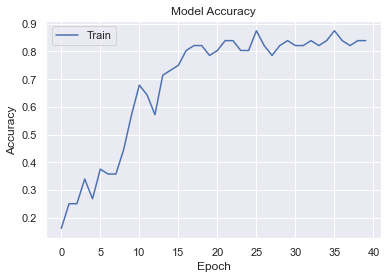

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

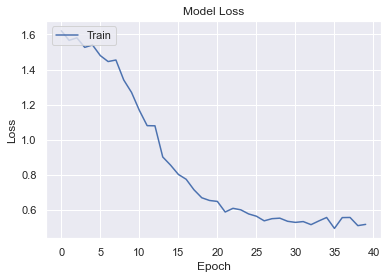

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [72]:
#performance_evaluation_train

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction = y_encoder.inverse_transform(model.predict(train_padded))
print(classification_report(train_data.intent, prediction))

                precision    recall  f1-score   support

Hardware Issue       0.54      0.70      0.61        10
   Login Issue       1.00      1.00      1.00        15
 Printer Issue       0.00      0.00      0.00         5
  Search Issue       1.00      1.00      1.00        12
Software Issue       0.81      0.93      0.87        14

      accuracy                           0.84        56
     macro avg       0.67      0.73      0.70        56
  weighted avg       0.78      0.84      0.81        56



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# #performance_evaluation_test

# from sklearn.metrics import classification_report

# with tf.device('/cpu:0'):
#     prediction_test = y_encoder.inverse_transform(model.predict(test_padded))
# print(classification_report(test_data.intent, prediction_test))

<AxesSubplot:>

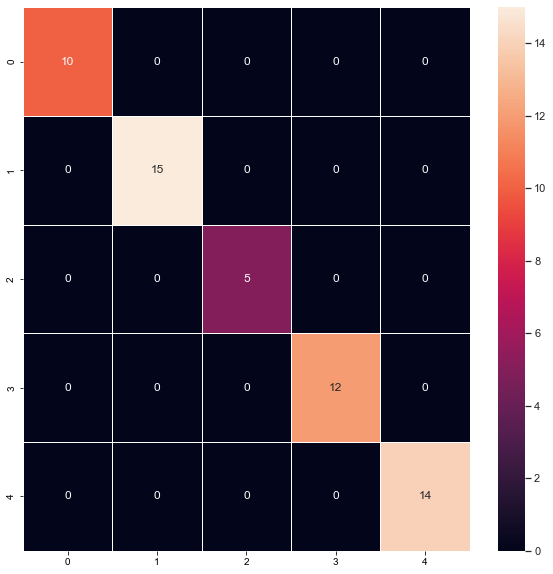

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(train_data.intent, prediction)

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [55]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

incorr_fraction

array([0., 0., 0., 0., 0.])

Text(0, 0.5, 'Fraction of incorrect predictions')

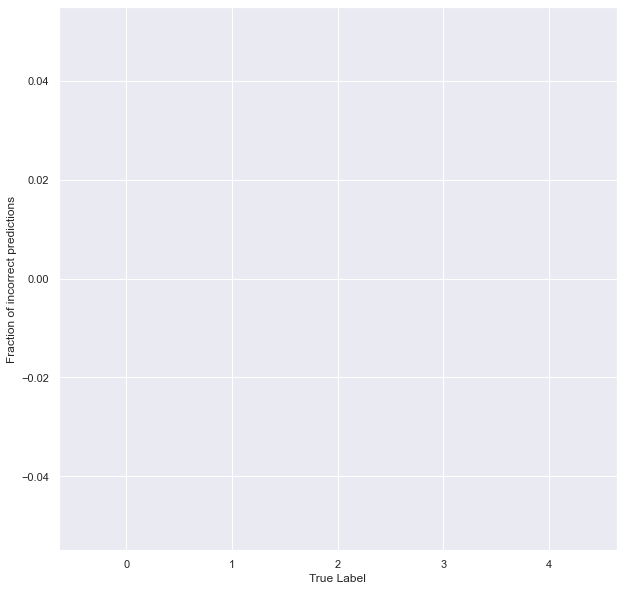

In [56]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))

plt.bar(np.arange(5), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [57]:
import keras
import pickle
import json

from keras.models import save_model

model.save('models/my_model_custom')

with open('utils/classes_custom.pkl','wb') as file:
   pickle.dump(classes,file)

with open('utils/tokenizer_custom.pkl','wb') as file:
   pickle.dump(tokenizer,file)

with open('utils/label_encoder_custom.pkl','wb') as file:
   pickle.dump(y_encoder,file)

INFO:tensorflow:Assets written to: models/my_model_custom\assets


INFO:tensorflow:Assets written to: models/my_model_custom\assets


In [64]:
# import keras
# import pickle

# model = keras.models.load_model('models/my_model')

# with open('utils/classes.pkl','rb') as file:
#   classes = pickle.load(file)

# with open('utils/tokenizer.pkl','rb') as file:
#   tokenizer = pickle.load(file)

# with open('utils/label_encoder.pkl','rb') as file:
#   y_encoder = pickle.load(file)